In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mlt
df=pd.read_csv('aerofit.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [30]:
# very less amount of data
df.shape

(180, 9)

In [31]:
# no null values
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [32]:

# income age miles are hinting outliers # can also use boxplot to confirm
## drop? No small data
## cap>>   25%-1.5IQR to  75%+1.5IQR
## mostly will use with grouping>> we can leave
df.describe()
     

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


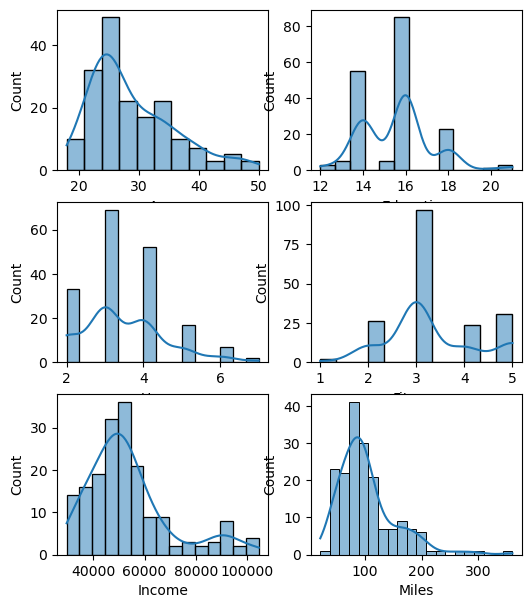

In [33]:
import matplotlib.pyplot as plt
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(6, 5))
fig.subplots_adjust(top=1.2)
sns.histplot(data=df, x="Age", kde=True, ax=axis[0,0])
sns.histplot(data=df, x="Education", kde=True, ax=axis[0,1])
sns.histplot(data=df, x="Usage", kde=True, ax=axis[1,0])
sns.histplot(data=df, x="Fitness", kde=True, ax=axis[1,1])
sns.histplot(data=df, x="Income", kde=True, ax=axis[2,0])
sns.histplot(data=df, x="Miles", kde=True, ax=axis[2,1])
plt.show()

In [34]:
df1 = df[['Product', 'Gender', 'MaritalStatus']].melt()

In [35]:
df1.groupby(['variable','value'])[['value']].count()/len(df)

value
variable      value              
Gender        Female     0.422222
              Male       0.577778
MaritalStatus Partnered  0.594444
              Single     0.405556
Product       KP281      0.444444
              KP481      0.333333
              KP781      0.222222

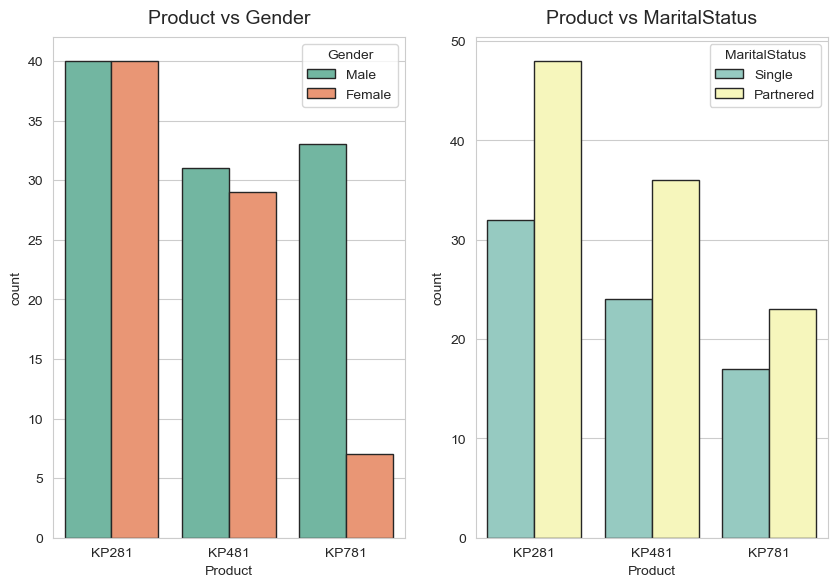

In [36]:
sns.set_style(style='whitegrid')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 6.5))
sns.countplot(data=df, x='Product', hue='Gender', edgecolor="0.15",
palette='Set2', ax=axs[0])
sns.countplot(data=df, x='Product', hue='MaritalStatus',
edgecolor="0.15", palette='Set3', ax=axs[1])
axs[0].set_title("Product vs Gender", pad=10, fontsize=14)
axs[1].set_title("Product vs MaritalStatus", pad=10, fontsize=14)
plt.show()

In [37]:
# logical
# what is the most important feature
# income >> education >> age
     

# EDA
## Bi
     

import seaborn as sns
     

<Axes: xlabel='Gender', ylabel='Income'>

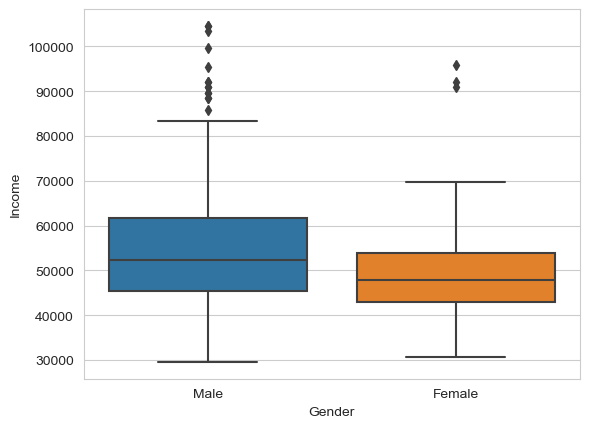

In [38]:

# males have more income than females?
sns.boxplot(x = "Gender", y="Income", data=df)

In [39]:
#  >> huge overlap>> will use this in walmart case study
# 95% conf>>>
# male >> 30k--80k
# female >> 30k--70k

<Axes: xlabel='Gender', ylabel='Income'>

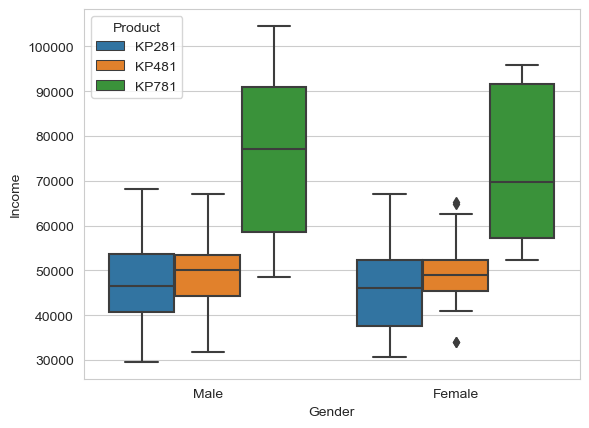

In [40]:
sns.boxplot(x = "Gender", y="Income", data=df, hue='Product')

In [41]:
df.groupby(['Gender', 'Product'])['Income'].describe()

count          mean           std      min       25%      50%  \
Gender Product                                                                  
Female KP281     40.0  46020.075000   9226.214704  30699.0  37521.00  46048.5   
       KP481     29.0  49336.448276   7984.486277  34110.0  45480.00  48891.0   
       KP781      7.0  73633.857143  19009.925227  52291.0  57271.00  69721.0   
Male   KP281     40.0  46815.975000   9022.407705  29562.0  40647.75  46617.0   
       KP481     31.0  48634.258065   9356.202876  31836.0  44343.00  50028.0   
       KP781     33.0  75825.030303  18675.002521  48556.0  58516.00  77191.0   

                     75%       max  
Gender Product                      
Female KP281    52302.00   67083.0  
       KP481    52302.00   65220.0  
       KP781    91508.50   95866.0  
Male   KP281    53723.25   68220.0  
       KP481    53439.00   67083.0  
       KP781    90886.00  104581.0

In [42]:

## insights
# 1>> more miles>>KP781
# 2>> more income>>KP781
# 3>> huge overlap, between product 281, 481 and miles, income

In [43]:
df_new = pd.get_dummies(df, columns=['Product']) # one hot encode


In [44]:
df_new

,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Product_KP281,Product_KP481,Product_KP781
0,18,Male,14,Single,3,4,29562,112,True,False,False
1,19,Male,15,Single,2,3,31836,75,True,False,False
2,19,Female,14,Partnered,4,3,30699,66,True,False,False
3,19,Male,12,Single,3,3,32973,85,True,False,False
4,20,Male,13,Partnered,4,2,35247,47,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
175,40,Male,21,Single,6,5,83416,200,False,False,True
176,42,Male,18,Single,5,4,89641,200,False,False,True
177,45,Male,16,Single,5,5,90886,160,False,False,True
178,47,Male,18,Partnered,4,5,104581,120,False,False,True


In [45]:
df['Gender'].value_counts(normalize=True)

Gender
Male      0.577778
Female    0.422222
Name: proportion, dtype: float64

In [46]:
pd.crosstab(index=df['Gender'], columns=df['Product'])

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


In [47]:
pd.crosstab(index=df['Gender'], columns=df['Product'], margins=True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


In [48]:
# get probabilites? divide buy total like value_counts
pd.crosstab(index=df['Gender'], columns=df['Product'], margins=True, normalize=True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,0.222222,0.161111,0.038889,0.422222
Male,0.222222,0.172222,0.183333,0.577778
All,0.444444,0.333333,0.222222,1.000000


In [49]:

# marginal/ joint/ conditional??
# prob>> Female & KP281>> 40/180 (joint)>>>0.222222
# prob>> Female>> 76/180 (marginal) >>> 0.422222
     

# prob>> given customer is female, they buy 781>> 7/76 >> 0.09210526315789473 # condn prob

In [50]:

pd.crosstab(index=df['Gender'], columns=df['Product'], margins=True, normalize='index')

Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308
All,0.444444,0.333333,0.222222


In [51]:

v = pd.crosstab(index=df['Gender'], columns=df['Product'], margins=True, normalize='index')

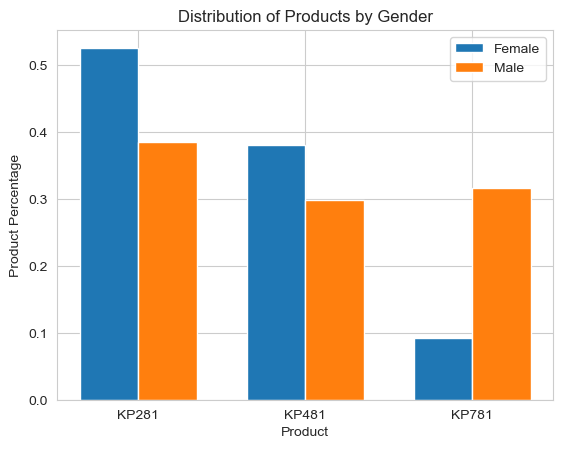

In [52]:
import matplotlib.pyplot as plt

# Data
product_names = ['KP281', 'KP481', 'KP781']
genders = ['Female', 'Male']
data = {
    'KP281': {'Female': 0.526316, 'Male': 0.384615},
    'KP481': {'Female': 0.381579, 'Male': 0.298077},
    'KP781': {'Female': 0.092105, 'Male': 0.317308}
}

# Extracting data for plotting
female_data = [data[product]['Female'] for product in product_names]
male_data = [data[product]['Male'] for product in product_names]

# Plotting
bar_width = 0.35
index = range(len(product_names))
plt.bar(index, female_data, bar_width, label='Female')
plt.bar([i + bar_width for i in index], male_data, bar_width, label='Male')

plt.xlabel('Product')
plt.ylabel('Product Percentage')
plt.title('Distribution of Products by Gender')
plt.xticks([i + bar_width / 2 for i in index], product_names)
plt.legend()
plt.show()
